<a href="https://colab.research.google.com/github/Arunav07/CRISTL-Project-1/blob/Atharva_D's-Branch/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import glob
import natsort
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
# import tensorflow.keras.utils.to_categorical
from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [11]:
Labels_Data = pd.read_csv("/content/AutomatedLabelFile.csv")
Labels_Data.shape

(663, 11)

In [12]:
Images = glob.glob("/content/gdrive/MyDrive/IDD_Detection/JPEGImages/highquality_16k/15-07-18-upload/*.jpg")

In [13]:
len(Images)

663

In [14]:
print(Images)

['/content/gdrive/MyDrive/IDD_Detection/JPEGImages/highquality_16k/15-07-18-upload/0001206.jpg', '/content/gdrive/MyDrive/IDD_Detection/JPEGImages/highquality_16k/15-07-18-upload/0001352.jpg', '/content/gdrive/MyDrive/IDD_Detection/JPEGImages/highquality_16k/15-07-18-upload/0000525.jpg', '/content/gdrive/MyDrive/IDD_Detection/JPEGImages/highquality_16k/15-07-18-upload/0002365.jpg', '/content/gdrive/MyDrive/IDD_Detection/JPEGImages/highquality_16k/15-07-18-upload/0002149.jpg', '/content/gdrive/MyDrive/IDD_Detection/JPEGImages/highquality_16k/15-07-18-upload/0001957.jpg', '/content/gdrive/MyDrive/IDD_Detection/JPEGImages/highquality_16k/15-07-18-upload/0001999.jpg', '/content/gdrive/MyDrive/IDD_Detection/JPEGImages/highquality_16k/15-07-18-upload/0002930.jpg', '/content/gdrive/MyDrive/IDD_Detection/JPEGImages/highquality_16k/15-07-18-upload/0002254.jpg', '/content/gdrive/MyDrive/IDD_Detection/JPEGImages/highquality_16k/15-07-18-upload/0001535.jpg', '/content/gdrive/MyDrive/IDD_Detection/

In [15]:
Image_array=[]
for i in Images:
  img = image.load_img(i,target_size=(256,256,3))
  img = image.img_to_array(img)
  img = img/255
  Image_array.append(img)
Image_Data = np.array(Image_array)

In [16]:
Image_Data.shape

(663, 256, 256, 3)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(Image_Data, Labels_Data, random_state=42, test_size=0.2)

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import UnidentifiedImageError
import skimage.io
import skimage.color
import skimage.filters
import io
from skimage import data, io, img_as_ubyte
from skimage.filters import threshold_multiotsu
# from tensorflow.python.keras.preprocessing.image import img_to_array

In [20]:
INIT_LR = 1e-4
EPOCHS = 30
BS = 32

In [22]:
baseModel = MobileNetV2(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(256, 256, 3)))
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(7, 7))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(11, activation="sigmoid")(headModel)
model = Model(inputs=baseModel.input, outputs=headModel)

In [23]:
for layer in baseModel.layers:
	layer.trainable = False

In [24]:
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [26]:
model.fit(X_train, y_train, steps_per_epoch=len(X_train) // BS,validation_data=(X_test, y_test),validation_steps=len(X_test) // BS,
	epochs=EPOCHS)

Epoch 1/30
16/16 [==============================] - 34s 2s/step - loss: 0.6910 - accuracy: 0.0321 - val_loss: 0.4619 - val_accuracy: 0.0150
Epoch 2/30
16/16 [==============================] - 25s 2s/step - loss: 0.5388 - accuracy: 0.0302 - val_loss: 0.4311 - val_accuracy: 0.0000e+00
Epoch 3/30
16/16 [==============================] - 24s 2s/step - loss: 0.4987 - accuracy: 0.0264 - val_loss: 0.4266 - val_accuracy: 0.0075
Epoch 4/30
16/16 [==============================] - 25s 2s/step - loss: 0.4926 - accuracy: 0.0264 - val_loss: 0.4248 - val_accuracy: 0.0075
Epoch 5/30
16/16 [==============================] - 24s 2s/step - loss: 0.4798 - accuracy: 0.0226 - val_loss: 0.4222 - val_accuracy: 0.0150
Epoch 6/30
16/16 [==============================] - 24s 2s/step - loss: 0.4725 - accuracy: 0.0226 - val_loss: 0.4220 - val_accuracy: 0.0075
Epoch 7/30
16/16 [==============================] - 24s 2s/step - loss: 0.4570 - accuracy: 0.0189 - val_loss: 0.4208 - val_accuracy: 0.0075
Epoch 8/30
16/16

In [29]:
img = image.load_img( '/content/gdrive/MyDrive/IDD_Detection/JPEGImages/highquality_16k/15-07-18-upload/0004627.jpg',target_size=(256,256,3))
img = image.img_to_array(img)
img = img/255

car (0.97905)
motorcycle (0.96971)
rider (0.95242)
vehicle_fallback (0.93354)
autorickshaw (0.85624)
person (0.82752)
truck (0.77859)
bus (0.67819)
traffic_sign (0.24187)
bicycle (0.050629)
animal (0.01318)


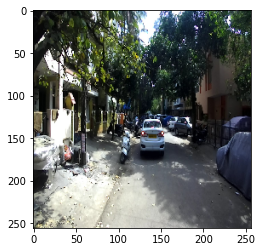

In [30]:
classes = np.array(Labels_Data.columns[:])
proba = model.predict(img.reshape(1,256,256,3))
top_11 = np.argsort(proba[0])[::-1]
for i in range(11):
    print("{}".format(classes[top_11[i]])+" ({:.5})".format(proba[0][top_11[i]]))
plt.imshow(img)